# IBM DS Capstone Project

#### Theophilus O. I

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [13]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [14]:
df1=df.filter(['SEVERITYCODE','WEATHER','LIGHTCOND','ROADCOND','COLLISIONTYPE'],axis=1)
df1.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND,COLLISIONTYPE
0,2,Overcast,Daylight,Wet,Angles
1,1,Raining,Dark - Street Lights On,Wet,Sideswipe
2,1,Overcast,Daylight,Dry,Parked Car
3,1,Clear,Daylight,Dry,Other
4,2,Raining,Daylight,Wet,Angles


In [15]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [17]:
from sklearn.utils import resample
df_1=df[df.SEVERITYCODE==1]
df_2=df[df.SEVERITYCODE==2]

df_1_downsampled=resample(df_1,replace=True,n_samples=58188,random_state=123)

balanceddf=pd.concat([df_1_downsampled,df_2])

balanceddf.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [18]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [19]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [20]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [21]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [22]:
df_m = df.loc[:, ['SEVERITYCODE', 'WEATHER', 'LIGHTCOND', 'ROADCOND']]

df_m.head()

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
0,2,Overcast,Daylight,Wet
1,1,Raining,Dark - Street Lights On,Wet
2,1,Overcast,Daylight,Dry
3,1,Clear,Daylight,Dry
4,2,Raining,Daylight,Wet


In [23]:
df_m.isnull().sum()

SEVERITYCODE       0
WEATHER         5081
LIGHTCOND       5170
ROADCOND        5012
dtype: int64

In [24]:
df_m.shape

(194673, 4)

In [25]:
df_m.dropna(axis=0, inplace=True)

In [26]:
df_m.isnull().sum()

SEVERITYCODE    0
WEATHER         0
LIGHTCOND       0
ROADCOND        0
dtype: int64

In [27]:
df_m.shape


(189337, 4)

In [28]:
df_m = df_m.drop(df_m[df_m['WEATHER'] == 'Unknown'].index)

df_m['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111008
Raining,33117
Overcast,27681
Snowing,901
Other,824
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,55
Severe Crosswind,25
Partly Cloudy,5


In [29]:
df_m = df_m.drop(df_m[df_m['WEATHER'] == 'Other'].index)

df_m['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111008
Raining,33117
Overcast,27681
Snowing,901
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,55
Severe Crosswind,25
Partly Cloudy,5


In [30]:
df_m = df_m.drop(df_m[df_m['LIGHTCOND'] == 'Unknown'].index)

df_m['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113225
Dark - Street Lights On,46964
Dusk,5685
Dawn,2429
Dark - No Street Lights,1423
Dark - Street Lights Off,1117
Other,187
Dark - Unknown Lighting,9


In [31]:
df_m = df_m.drop(df_m[df_m['LIGHTCOND'] == 'Other'].index)

df_m['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113225
Dark - Street Lights On,46964
Dusk,5685
Dawn,2429
Dark - No Street Lights,1423
Dark - Street Lights Off,1117
Dark - Unknown Lighting,9


In [32]:

df_m = df_m.drop(df_m[df_m['LIGHTCOND'] == 'Dark - Unknown Lighting'].index)

df_m['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113225
Dark - Street Lights On,46964
Dusk,5685
Dawn,2429
Dark - No Street Lights,1423
Dark - Street Lights Off,1117


In [33]:
df_m = df_m.drop(df_m[df_m['ROADCOND'] == 'Unknown'].index)

df_m['ROADCOND'].value_counts().to_frame()


,ROADCOND
Dry,121487
Wet,46319
Ice,1080
Snow/Slush,833
Standing Water,105
Other,103
Sand/Mud/Dirt,65
Oil,60


In [34]:
df_m = df_m.drop(df_m[df_m['ROADCOND'] == 'Other'].index)

df_m['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,121487
Wet,46319
Ice,1080
Snow/Slush,833
Standing Water,105
Sand/Mud/Dirt,65
Oil,60


In [35]:
df_m.shape


(169949, 4)

In [36]:
df_m['SEVERITYCODE'] = df_m['SEVERITYCODE'].astype(str)

In [37]:
df_m.dtypes

SEVERITYCODE    object
WEATHER         object
LIGHTCOND       object
ROADCOND        object
dtype: object

In [38]:
df_m.describe(include="all")

,SEVERITYCODE,WEATHER,LIGHTCOND,ROADCOND
count,169949,169949,169949,169949
unique,2,9,6,7
top,1,Clear,Daylight,Dry
freq,114269,108822,112618,121487


Since the model rests solely on categorical variables, we will use the following methods to explore the relationship between each independent variable and the dependent variable.

i) a count plot: to visualize the distribution of data.

ii) a contingency table: to display the percentages of the frequency distribution.

iii) a Cramer's V test: to obtain a metric about the correlation between the categorical variables.

.

a) RELATIONSHIP WITH INDEPENDENT VARIABLE 1 'WEATHER'

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

i) Count Plot

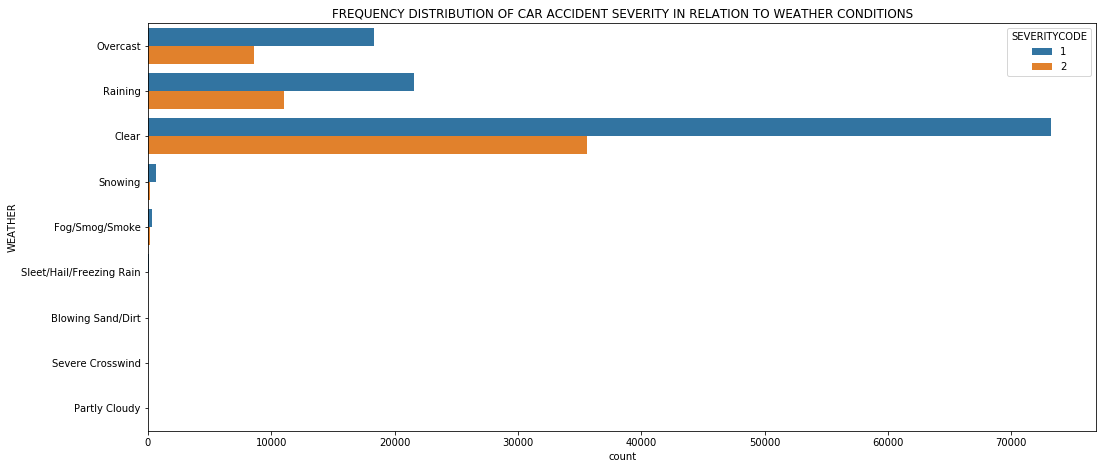

In [41]:
fig = plt.gcf()

fig.set_size_inches(17, 7.5)

graph1 = sns.countplot(y='WEATHER', hue='SEVERITYCODE', data=df_m).set_title('FREQUENCY DISTRIBUTION OF CAR ACCIDENT SEVERITY IN RELATION TO WEATHER CONDITIONS')

ii) Contingency Table

In [43]:

! pip install  researchpy

import researchpy as rp
crosstab1, test_results1 = rp.crosstab(df_m["WEATHER"], df_m["SEVERITYCODE"],
                                               test= "chi-square",
                                               prop= "cell")

crosstab1

SEVERITYCODE               
                                    1      2     All
WEATHER                                             
Blowing Sand/Dirt                0.02   0.01    0.03
Clear                           43.10  20.94   64.03
Fog/Smog/Smoke                   0.22   0.11    0.33
Overcast                        10.77   5.07   15.84
Partly Cloudy                    0.00   0.00    0.00
Raining                         12.69   6.52   19.21
Severe Crosswind                 0.01   0.00    0.01
Sleet/Hail/Freezing Rain         0.05   0.02    0.06
Snowing                          0.39   0.10    0.49
All                             67.24  32.76  100.00

iii) Cramer's V test

In [44]:
test_results1

,Chi-square test,results
0,Pearson Chi-square ( 8.0) =,93.3721
1,p-value =,0.0000
2,Cramer's V =,0.0234


.

b) RELATIONSHIP WITH INDEPENDENT VARIABLE 2 'LIGHTCOND'

i) Count Plot

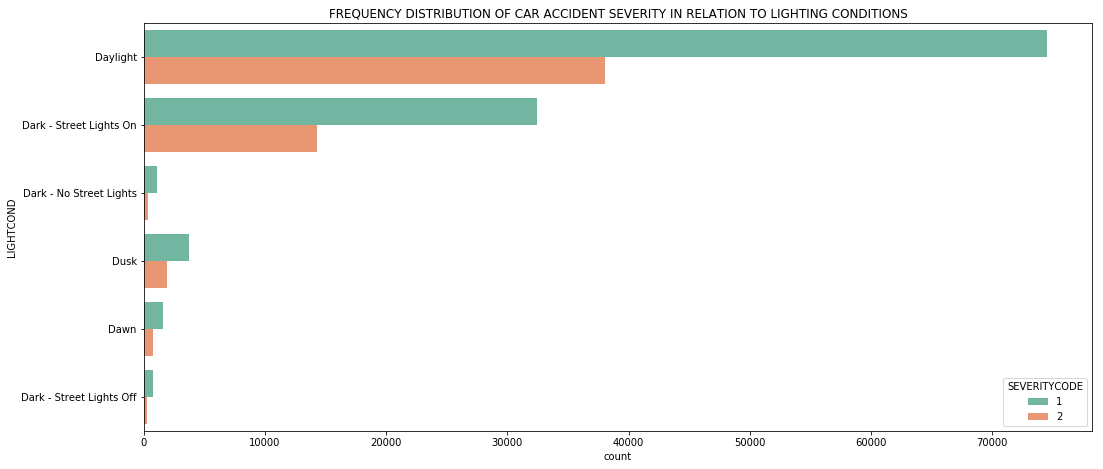

In [45]:
fig = plt.gcf()

fig.set_size_inches(17, 7.5)

graph2 = sns.countplot(y='LIGHTCOND', hue='SEVERITYCODE', data=df_m, palette='Set2').set_title('FREQUENCY DISTRIBUTION OF CAR ACCIDENT SEVERITY IN RELATION TO LIGHTING CONDITIONS')


ii) Contingency Table

In [46]:
crosstab2, test_results2 = rp.crosstab(df_m["LIGHTCOND"], df_m["SEVERITYCODE"],
                                               test= "chi-square",
                                               prop= "cell")

crosstab2

SEVERITYCODE               
                                    1      2     All
LIGHTCOND                                           
Dark - No Street Lights          0.64   0.19    0.83
Dark - Street Lights Off         0.47   0.18    0.66
Dark - Street Lights On         19.11   8.39   27.51
Dawn                             0.95   0.47    1.42
Daylight                        43.86  22.41   66.27
Dusk                             2.21   1.12    3.32
All                             67.24  32.76  100.00

iii) Cramer's V test results

In [48]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,241.8456
1,p-value =,0.0000
2,Cramer's V =,0.0377


c) RELATIONSHIP WITH INDEPENDENT VARIABLE 3 'ROADCOND'

i) Count Plot

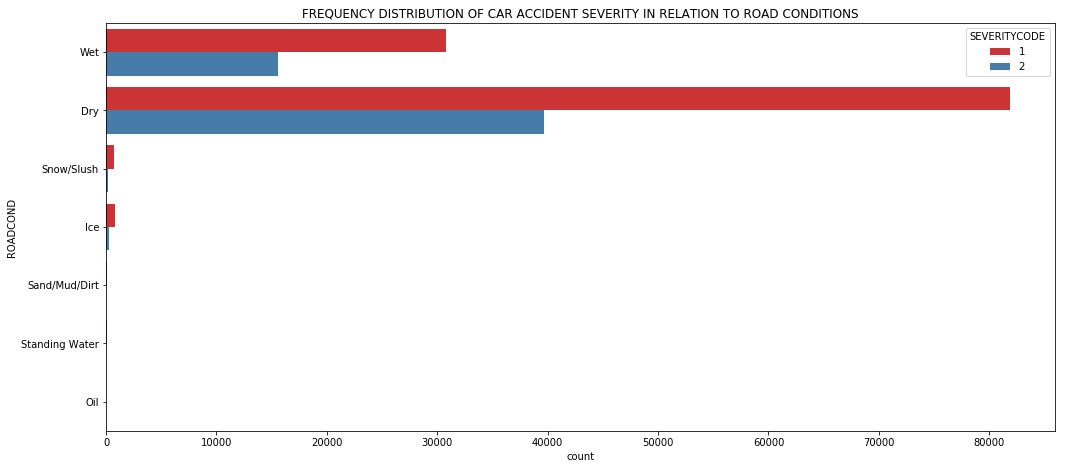

In [49]:
fig = plt.gcf()

fig.set_size_inches(17, 7.5)

graph3 = sns.countplot(y='ROADCOND', hue='SEVERITYCODE', data=df_m, palette="Set1").set_title('FREQUENCY DISTRIBUTION OF CAR ACCIDENT SEVERITY IN RELATION TO ROAD CONDITIONS')

ii) Contingency Table

In [50]:
crosstab3, test_results3 = rp.crosstab(df_m["ROADCOND"], df_m["SEVERITYCODE"],
                                               test= "chi-square",
                                               prop= "cell")

crosstab3

SEVERITYCODE               
                          1      2     All
ROADCOND                                  
Dry                   48.15  23.33   71.48
Ice                    0.48   0.15    0.64
Oil                    0.02   0.01    0.04
Sand/Mud/Dirt          0.03   0.01    0.04
Snow/Slush             0.40   0.09    0.49
Standing Water         0.05   0.02    0.06
Wet                   18.12   9.14   27.25
All                   67.24  32.76  100.00

iii) Cramer's V test results

In [51]:
test_results3

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,126.8703
1,p-value =,0.0000
2,Cramer's V =,0.0273


The statistical analysis for the three relationships explored were similar. Results of the methods used are presented below:

i) All independent variables data have two categories.

ii) The percentages reveal, furthermore, that all the independent variables have at least one category that contains at least 60% of the data: for 'WEATHER' it is Clear, for 'LIGHTCOND' it is Daylight, and for 'ROADCOND' Dry. Differences for the severity of car accident occur in these categories, and the second highest frequent category in each variable, but are rendered almost imperceptible for the rest of the labels.

iii) Cramer's V test measures the correlation strength between categorical variables on a scale of 0 to 1 based on the results of a Chi-square test (which produce a Pearson Chi-squere and a p-value). All relationships have Cramer's V below 0.05, signaling a very weak relationship. When the Pearson Chi-square is high and the p-value is small, association can be interpreted, which occured for the three relationships; however, large datasets, such as the one used, tend to give such results given their size. The most reliable metric for categorical variables relationships is the Cramer's V.

None of the so-called environmental variables displayed a relationship predicting the severity of a car accident. Hence, environmental conditions are not good predictors of car accident severity. No strong predictive model can be obtained out of them.

Car accident severity might, therefore, be connected to human and machine related variables which are not recorded in used data.